In [1]:
import keras


In [ ]:
from keras.layers import SimpleRNN

In [2]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # Ostatnia warstwa zwraca tylko ostatni obiekt wyjściowy.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # Liczba słów traktowanych jako cechy.
maxlen = 500  # Ucina recenzje po tej liczbie słów należących do zbioru max_features słów najczęściej występujących w zbiorze.
batch_size = 32

print('Ładowanie danych...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'sekwencje treningowe')
print(len(input_test), 'sekwencje testowe')

print('Sekwencje (próbki x czas)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Kształt obiektu input_train:', input_train.shape)
print('Kształt obiektu input_test:', input_test.shape)


Ładowanie danych...
25000 sekwencje treningowe
25000 sekwencje testowe
Sekwencje (próbki x czas)
Kształt obiektu input_train: (25000, 500)
Kształt obiektu input_test: (25000, 500)


In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 196ms/step - loss: 0.5567 - acc: 0.7132 - val_loss: 0.5112 - val_acc: 0.7624
Epoch 2/10
157/157 [==============================] - 29s 182ms/step - loss: 0.3540 - acc: 0.8558 - val_loss: 0.4019 - val_acc: 0.8396
Epoch 3/10
157/157 [==============================] - 31s 199ms/step - loss: 0.2827 - acc: 0.8906 - val_loss: 0.3631 - val_acc: 0.8572
Epoch 4/10
157/157 [==============================] - 32s 201ms/step - loss: 0.2374 - acc: 0.9094 - val_loss: 0.3506 - val_acc: 0.8568
Epoch 5/10
157/157 [==============================] - 30s 194ms/step - loss: 0.1957 - acc: 0.9277 - val_loss: 0.3855 - val_acc: 0.8384
Epoch 6/10
157/157 [==============================] - 33s 210ms/step - loss: 0.1661 - acc: 0.9401 - val_loss: 0.3899 - val_acc: 0.8580
Epoch 7/10
157/157 [==============================] - 37s 235ms/step - loss: 0.1229 - acc: 0.9561 - val_loss: 0.3914 - val_acc: 0.8588
Epoch 8/10
157/157 [==============================] - 2

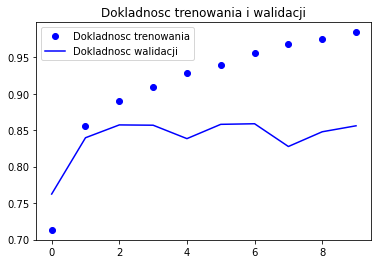

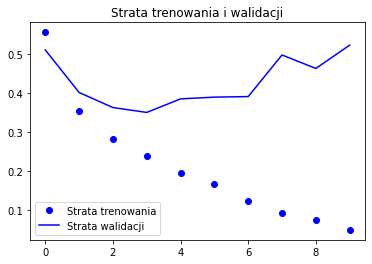

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 85s 517ms/step - loss: 0.4869 - acc: 0.7700 - val_loss: 0.4172 - val_acc: 0.8254
Epoch 2/10
157/157 [==============================] - 75s 477ms/step - loss: 0.2885 - acc: 0.8878 - val_loss: 0.4201 - val_acc: 0.8606
Epoch 3/10
157/157 [==============================] - 75s 480ms/step - loss: 0.2342 - acc: 0.9098 - val_loss: 0.2850 - val_acc: 0.8916
Epoch 4/10
157/157 [==============================] - 76s 484ms/step - loss: 0.2031 - acc: 0.9248 - val_loss: 0.3292 - val_acc: 0.8852
Epoch 5/10
157/157 [==============================] - 75s 479ms/step - loss: 0.1819 - acc: 0.9348 - val_loss: 0.2941 - val_acc: 0.8794
Epoch 6/10
157/157 [==============================] - 77s 489ms/step - loss: 0.1604 - acc: 0.9445 - val_loss: 0.4050 - val_acc: 0.8752
Epoch 7/10
157/157 [==============================] - 73s 465ms/step - loss: 0.1445 - acc: 0.9480 - val_loss: 0.3451 - val_acc: 0.8840
Epoch 8/10
157/157 [==============================] - 7

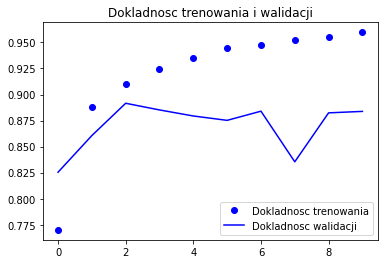

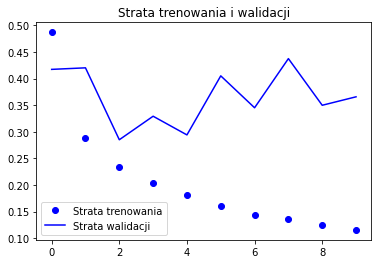

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()